In [5]:
import sys
import numpy as np

In [2]:
azimuth = np.loadtxt('data/azimuths.txt').reshape(1800, 40)
elevation = np.loadtxt('data/elevations.txt')
distance = np.loadtxt('data/distances.txt').reshape(1800, 40)


In [4]:
print (azimuth.shape)
print (elevation.shape)
print (distance.shape)

(1800, 40)
(40,)
(1800, 40)


In [ ]:
# Given the above lidar scan raw points, perform euclidean clustering. 

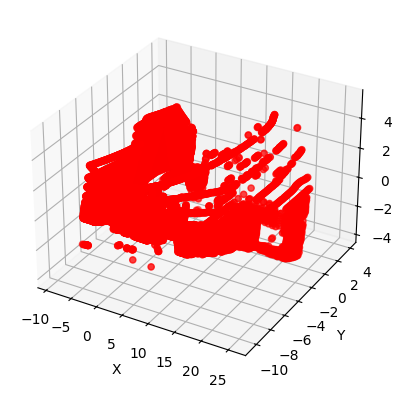

In [6]:
# Generated by co-pilot
# prompt: if I have azimuth, range and elevation vectors , how can I visualize the data?
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def spherical_to_cartesian(azimuth, elevation, range):
    """
    Convert spherical coordinates to Cartesian coordinates.
    
    Parameters:
    azimuth (numpy.ndarray): Azimuth angles in radians.
    elevation (numpy.ndarray): Elevation angles in radians.
    range (numpy.ndarray): Range distances.
    
    Returns:
    tuple: Arrays of x, y, z coordinates.
    """
    x = range * np.cos(elevation) * np.cos(azimuth)
    y = range * np.cos(elevation) * np.sin(azimuth)
    z = range * np.sin(elevation)
    return x, y, z

# Example usage
if __name__ == "__main__":
    # Example data (replace these with your actual data)
    azimuth = np.loadtxt('data/azimuths.txt').reshape(1800, 40)
    elevation = np.loadtxt('data/elevations.txt').reshape(1, 40)
    distance = np.loadtxt('data/distances.txt').reshape(1800, 40)
    
    # Convert to Cartesian coordinates
    x, y, z = spherical_to_cartesian(azimuth, elevation, distance)
    
    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='r', marker='o')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()

In [ ]:
# As long as 2 points are within a distance threshhold, we want to keep them in the same cluster.
# This means, (A, B), (B, C) are in same cluster as long as they are closer than threshold even if (A, C) are more than threshold apart.

In [ ]:
def cluster_points(distance_threshold):
    # let's assume that return is cluster_id per point
    azimuth = np.loadtxt('data/azimuths.txt').reshape(1800, 40)
    elevation = np.loadtxt('data/elevations.txt').reshape(1, 40)
    distance = np.loadtxt('data/distances.txt').reshape(1800, 40)
    
    # Convert to Cartesian coordinates
    x, y, z = spherical_to_cartesian(azimuth, elevation, distance)
    points = np.stack(x, v, z)
    tree = KDTree(points)

    cluster = np.zeros(1800, 40)
    current_id = 1
    Q = list()
    while True:
        source = (cluster == 0)
        while len(source) > 0:
            source = source.first()
            near_points = tree.query_radius(points, r=distance_threshold)
            to_edit_points = cluster[near_points] != cluster_id
            if len(to_edit_points) == 0:
                break
            Q.extend(to_edit_points)
            cluster[to_edit_points] = cluster_id
        
        cluster_id += 1
        